# Section 6: Symbols, Threads and Fibers 🧶

#### En Ruby, un símbolo es un identificador cuyo valor es ``sí mismo``

In [ ]:
sym = 10
:sym

puts sym.inspect
puts :sym.inspect

:holatilines

# Para ver todos los simbolos disponbiles en orden usamos
puts Symbol.all_symbols.sort

In [ ]:
# Prueba de que los simbolos son valores autontenidos

x = 10
:x

puts x
puts :x

#### Los símbolos son ``únicos``, siempre mantienen su ID

Los números también tienen esta cualidad, pero los símbolos tienen la ventaja de ser descriptivos en su declaración

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

# Todos los ids son el mismo (Descriptivo)
puts( :ten.object_id )
puts( :ten.object_id )
puts( :ten.object_id )

# Todos los ids son el mismo (No Descriptivo)
puts( 10.object_id )
puts( 10.object_id )
puts( 10.object_id )

# Todos los ids son distintos (Descriptivo)
puts( "ten".object_id )
puts( "ten".object_id )
puts( "ten".object_id )

#### Los simbolos se usan para muchas cosas por esto mismo, como los attr accesors de las clases

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com
# more on reading and writing attributes

class Thing      			    
  attr_reader :name, :description
  attr_writer(:name, :description)
  attr_accessor(:value, :id, :owner)
end      

t = Thing.new
t.name = "A Thing"
t.description = "A soft, furry wotsit"
t.value = 100
t.id = "TH100SFW"
t.owner = "Me"
puts("#{t.name} is #{t.description}, it is worth $#{t.value}")
puts("it's id is #{t.id}. It is owned by #{t.owner}.")

#### Se usan también cuando te quieres referir por nombre a los id's de los métodos de Ruby

Aquí estamos viendo en vivo como tras ``remover el método reverse de la clase String de Ruby``, refiríendose a ella por medio de un símbolo, esta ya no existe más ☠️

Esto ya es parte del aún lejano mundo de los programas auto-modificables

In [ ]:
puts( "hello".reverse )

class String
	remove_method( :reverse )
end

puts( "hello".reverse )

> *Aquí fue hecho un breve momento de lectura del capítulo 11 del libro de este sujeto*

La función de ``attr_reader`` y ``attr_writter``

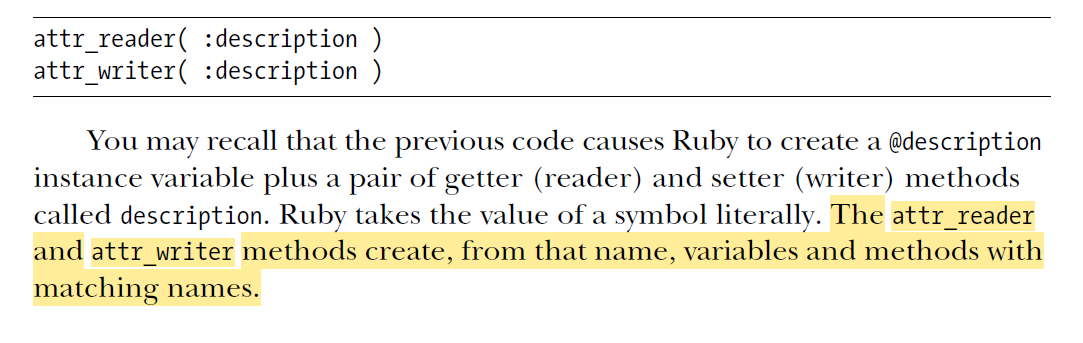

> Remember that the actual IDs assigned to objects ``will change each time you run a program``.

#### Comprobando la igualidad de los símbolos:

In [ ]:
puts :holatilines.equal?(:holatilines) #true
puts "holatilines".equal?("holatilines") #false
puts 1.equal?(1) #true

#### Siendo inequívocos, los símbolos se pueden usar como argumentos muy precisos dentro de un método

Aquí un código que representa la función de mi confiable reloj de ejercicio. ``Usarlos de forma preferente a los strings``

In [ ]:
def selectOption(option)
  currentMode = "Waiting..."
  if option == :volleyball
    print "🏐"
    puts "Now playing volleyball!"
    currentMode = "Volleyball"
  elsif option == :running
    print "🏃"
    puts "Now running!"
    currentMode = "Runing"
  else
    print "❎"
    puts "Option not supported..."
  end
  return "Current mode: #{currentMode}"
end

puts selectOption("skjdsjkd")
puts
puts selectOption(:volleyball)
puts
puts selectOption(:running)

#### Lo mismo pero con un case

In [ ]:
def selectOption(option)
  currentMode = "Waiting..."
  case option
  when :volleyball
    print "🏐"
    puts "Now playing volleyball!"
    currentMode = "Volleyball"
  when :running
    print "🏃"
    puts "Now running!"
    currentMode = "Runing"
  else
    print "❎"
    puts "Option not supported..."
  end
  return "Current mode: #{currentMode}"
end

puts selectOption("skjdsjkd")
puts
puts selectOption(:volleyball)
puts
puts selectOption(:running)


> El scope de un simbolo no afecta su unicidad, son únicos a nivel global

Esto es para pegarse 4 tiros

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

def thePrinter(arg)
  p arg
  # puts( "[class=#{somearg.class}]\n" ) #<= uncomment to verify classes
end


x = 1 # try changing this value to 100 or "hello world"
xsymbol = :x

puts '- Test #1 ------------'
puts'thePrinter(x)'
thePrinter(x)
puts('thePrinter(:x)')
thePrinter(:x)

# Es posible encontrar el valor de la variable X a través del símbolo :x ?

puts '- Test #2 ------------'
puts('thePrinter(eval(:x.id2name))')
thePrinter( eval(:x.id2name)) #SI LO ES ._________________________________________.
thePrinter(eval(:x.to_s)) # .to_s logra el mismo resultado que id2name, el cual es un método de la clase Símbolo
# Eval es un método del Kernel de Ruby, cuando se le pasa un string, en este caso "x", busca por el código una declaración llamada x y devuelve su valor ._.


puts '- Test #3 ------------'
thePrinter(xsymbol) # Hace lo que debe hacer
thePrinter(:xsymbol) # Devuelve lo que se le ha dado
thePrinter(eval(:xsymbol.id2name)) #Se obtiene lo asignado a través de la evaluación, el procedimiento es de obtención no de instanciamiento
thePrinter(eval((eval(:xsymbol.id2name)).id2name)) #Obtenido ese valor, se usa de referencia para encontrar la variable llamada igual que el símbolo

puts '- Test #4 ------------'
method(:thePrinter).call("") #Manera rebuscada de llamar un método refiriendose a el por su símbolo asociado, asumo que lo obtiene usando por detrás el código de arriba. Lo que está entre paréntesis de .call() son los argumentos regulares
method(:thePrinter).call(eval(:x.id2name)) # Se llama como argumento al valor obtenido al evaluar la extracción del valor del simbolo en sí mismo


#### Ruby es un circo con todos los payasos dentro, y yo ahora me estoy poniendo el maquillaje también 💎🤡

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

def thetalker(arg)
  print("Big sister says: " << arg)
end

the_complete_method_name_omg = method(:thetalker)

# Tras haber llamado su referencia completa dentro del símbolo, ahora tenemos un método entero dentro de una variable ._.
# Sabemos que es el método como tal porque especifica que viene de la clase Object
puts(the_complete_method_name_omg) #<Method: Object#thetalker(arg) c:/Users/Erick Rivera/Desktop/trabajo/tecya/Ruby Avanzado/bookofruby_code/ch11/symbols_3.rb:3>

# Es reconocido por su clase y todo
puts("#{the_complete_method_name_omg.class}")

#Y puede ser llamado usando .call()
the_complete_method_name_omg.call("Hola, T I L I N E S")

#### Ni hace falta decir que los símbolos se usan mucho en la metaprogramación, y en un tal Ruby on Rails que nadie conoce, pero eso es secundario

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

# Creación de nuevo método dentro de la clase Array
class Array
  define_method( :aNewMethod, lambda{
    |*args| puts( args.inspect)
    } )
end

# Se ejectuta, funciona.
puts( Array.method_defined?( :aNewMethod ) )	# true
[].aNewMethod( 1,2,3 )

# Se remueve
class Array
  remove_method( :aNewMethod )
end

# Ya no funciona
puts( Array.method_defined?( :aNewMethod ) )	# false
# [].aNewMethod( 1,2,3 ) #<= NoMethodError

> Un símbolo, esté donde esté, es un ``apuntador`` a la gran tabla de símbolos.

### Programación multi-hilo 👁️

Para lograr que los programas hagan más de una tarea a la vez sin trabarse ✨

> Los hilos son programas autocontenidos que existen dentro de programas más grandes.
> Dentro de un programa se corre el proceso principal, y en ese proceso principal se ejecutan uno o más hilos

In [ ]:
p Thread.main{ puts "Hola tilines estoy bloqueando" }

#### Estados de los hilos

In [ ]:
# Example taken from Ruby 1.9 documentation

a = Thread.new { raise("die now") }
b = Thread.new { Thread.stop }
c = Thread.new { Thread.exit }
d = Thread.new { sleep }

p   d.kill                  #=> #<Thread:0x401b3678 aborting>
p   a.status                #=> nil
p   b.status                #=> "sleep"
p   c.status                #=> false
p   d.status                #=> "aborting"
p   Thread.current.status   #=> "run"

# Por razones fuera de mi control, todos los threads estaban arriba ._.

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com


puts( "Main thread: #{Thread.main.inspect}" )
puts( Thread.new{ }.inspect )
puts( Thread.new{ sleep }.kill.inspect )
puts( Thread.new{ sleep }.inspect )
puts( Thread.new{ Thread.stop }.inspect )
puts( Thread.new{
			for i in (1..100) do
				i += 1
			end }.inspect )
puts( "Main thread: #{Thread.main.inspect}" )


puts( "\n💃💃💃 Compare Thread status and Thread inspect 💃💃💃" )
thread1 = Thread.new{ }
puts( "thread1.status: #{thread1.status}, thread1.inspect #{thread1.inspect}" )

puts ".............................................................................."

thread2 = Thread.new{ raise( "Exception raised!" ) }
puts( "thread2.status: #{thread2.status.inspect}, thread2.inspect #{thread2.inspect}" )

# NOTE: critical is only available in Ruby 1.8 or earlier
# Thread.critical = true # prohibits scheduling of any existing thread (e.g by sleep)
# thread3 = Thread.new{ sleep }.kill
# puts( "thread3.status: #{thread3.status}, thread3.inspect #{thread3.inspect}" )

> Para saber más de los threads, leer el capi 17 del libro y revisar todos los scripts relacionados 🙃

Este códígo tiene 2 Threads:
  - Uno recorre un array de palabras
  - El otro recorre un array de números

Ambos threads se combinan en su ejecución, se recorre uno y luego el otro, se muestra el tiempo que demoró toda la operación desde el inicio hasta el final con la clase Time

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

words = ["hello", "world", "goodbye", "mars" ]
numbers = [1,2,3,4,5,6,7,8,9,10]

startTime = Time.new
puts( "Start: %10.9f" % startTime )

# En Ruby, un hilo es un objeto, se crea con Thread.new
wordsThread = Thread.new{
	words.each{ |word| puts( word ) }
}

numbersThread = Thread.new{
	numbers.each{ |number| puts( number ) }
}

# Para unir dos hilos, se usa t.join
[wordsThread, numbersThread].each{ |t| t.join }

endTime = Time.new
puts( "End: %10.9f" % endTime.to_f )
totalTime = endTime-startTime
puts( "Total Time: %10.9f" % totalTime.to_f )


Este código pretende crear 3 hilos, los cuales cada uno hace uso un millón de veces del método addNum hacia una variable global. El resultado dentro de esa variable debería ser 3 millones. Pero no lo es. Y ``el resultado es siempre distinto``.

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

$i = 0

def addNum(aNum)
	aNum + 1
end

# Que es lo que hace collect? Es un .map viejo?
somethreads = (1..3).collect {
	Thread.new {
		1000000.times{ $i = addNum($i)  }
	}
}


somethreads.each{|t| t.join } 
puts( $i )

Esto ocurre porque cada thread lleva la cuenta por separado en que parte va su propio ciclo .times; Como los 3 threads compiten por hacer una asignación a la variable y ``al ser procesos independientes sus valores no están sincronizados``, entonces se crean estas inexactitudes.

-------
Para mitigar esto, se utiliza un objeto de clase **Mutex**, que ``fuerza la sincronización entre hilos``.

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

require 'thread'


$i = 0
semaphore = Mutex.new

def addNum(aNum)
	aNum + 1
end

somethreads = (1..3).collect {
	Thread.new {
    # Se usa el metodo synchronize de la clase Mutex
		semaphore.synchronize{
			1000000.times{ $i = addNum($i)  }
		}
	}
}

# Ahora el cálculo siempre dará 3 millones
somethreads.each{|t| t.join } 
puts( $i )

#### Los Fibers son como threads, pero con sintaxis de bloque, su ejecución debe ser controlada por el propio usuario

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

require 'fiber'

f = Fiber.new do
	puts( "In fiber" )
  Fiber.yield( "yielding" )
	puts( "Still in fiber" )
	Fiber.yield( "yielding again" )
	puts( "But still in fiber" )
end

# Este no inte
puts( "HOLA AQUI VIENE UN FIBER" )
puts( f.resume )
puts( "INTERRUMPO!!" )
puts ( f.resume )
puts( "LALALALALALALAL" )
puts( f.resume )
puts( "SOS" )

if (f.alive?) then
	puts( f.resume )
else
	puts("Error: El fiber se petatió" )
end

Es un programa que podemos interrumpir, se pueden añadir para esto, a ``yields`` a modo de ``breakpoints``. Se puede en todo momento comprobar el estado de un fiber con fiber.alive, y actuar en consecuencia.

# Section 7: Modules and Mixins 🧩

A diferencia de otros lenguajes de programación (C++ 💀), las clases en Ruby sólo permiten una ``línea de descencia``.

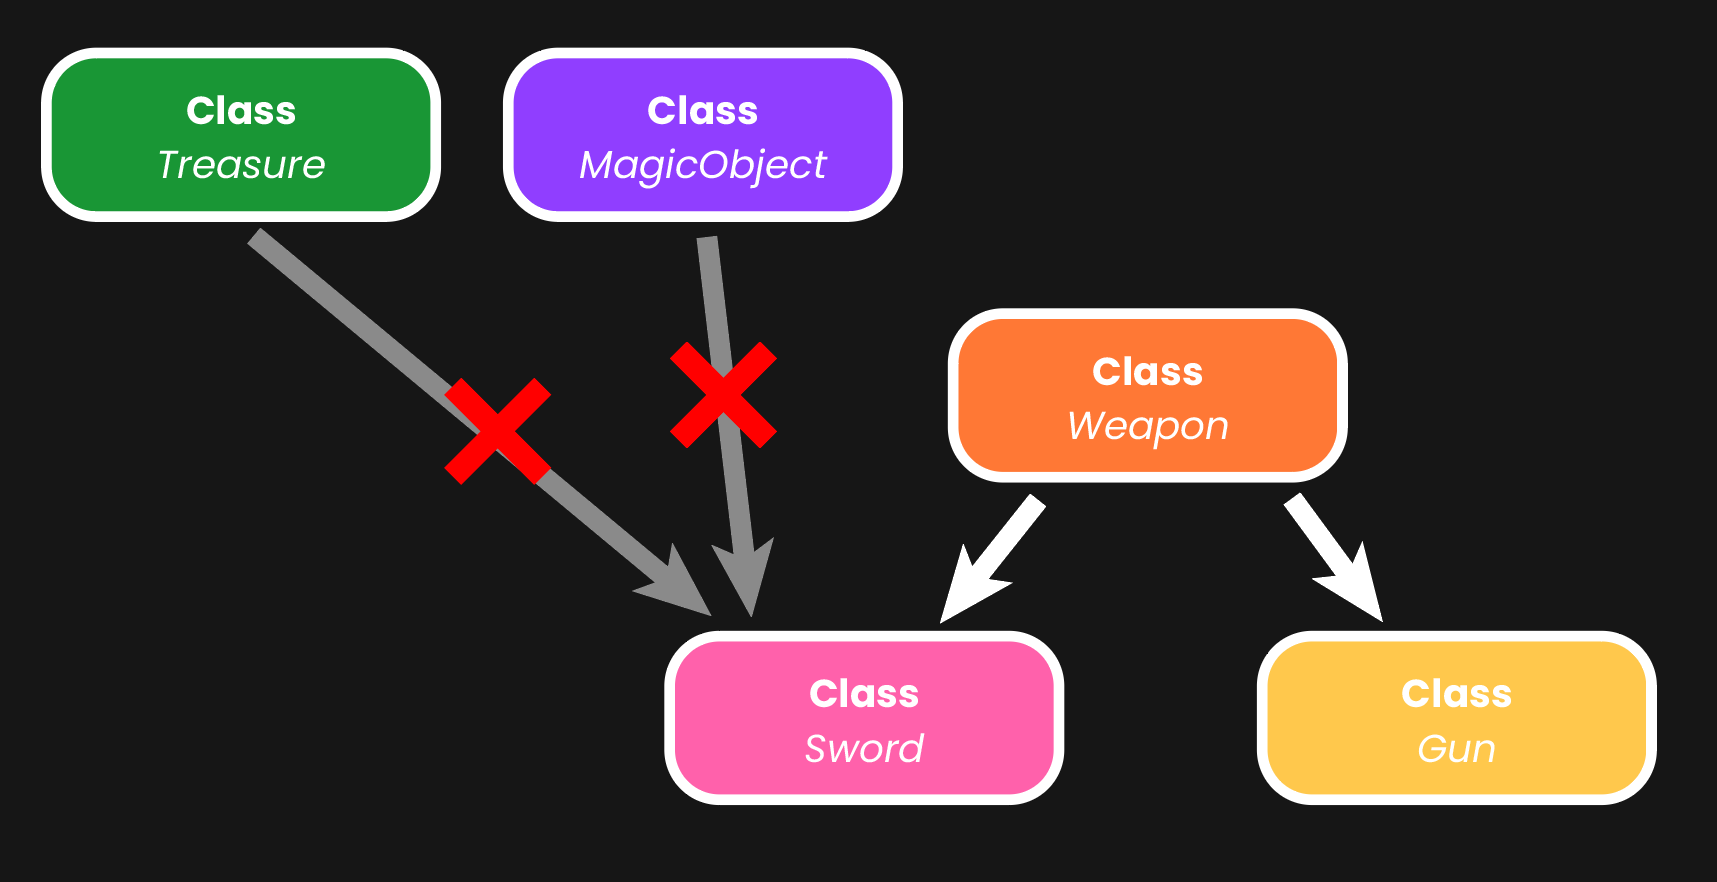

Para solventar esto, en Ruby se usan los ``módulos``, que envuelven contenido que normalmente iría en clases para así pasar su contenido, a la clase hija que queremos que tenga sus propiedades. ``Los módulos incluidos, son llamados Mixins.``

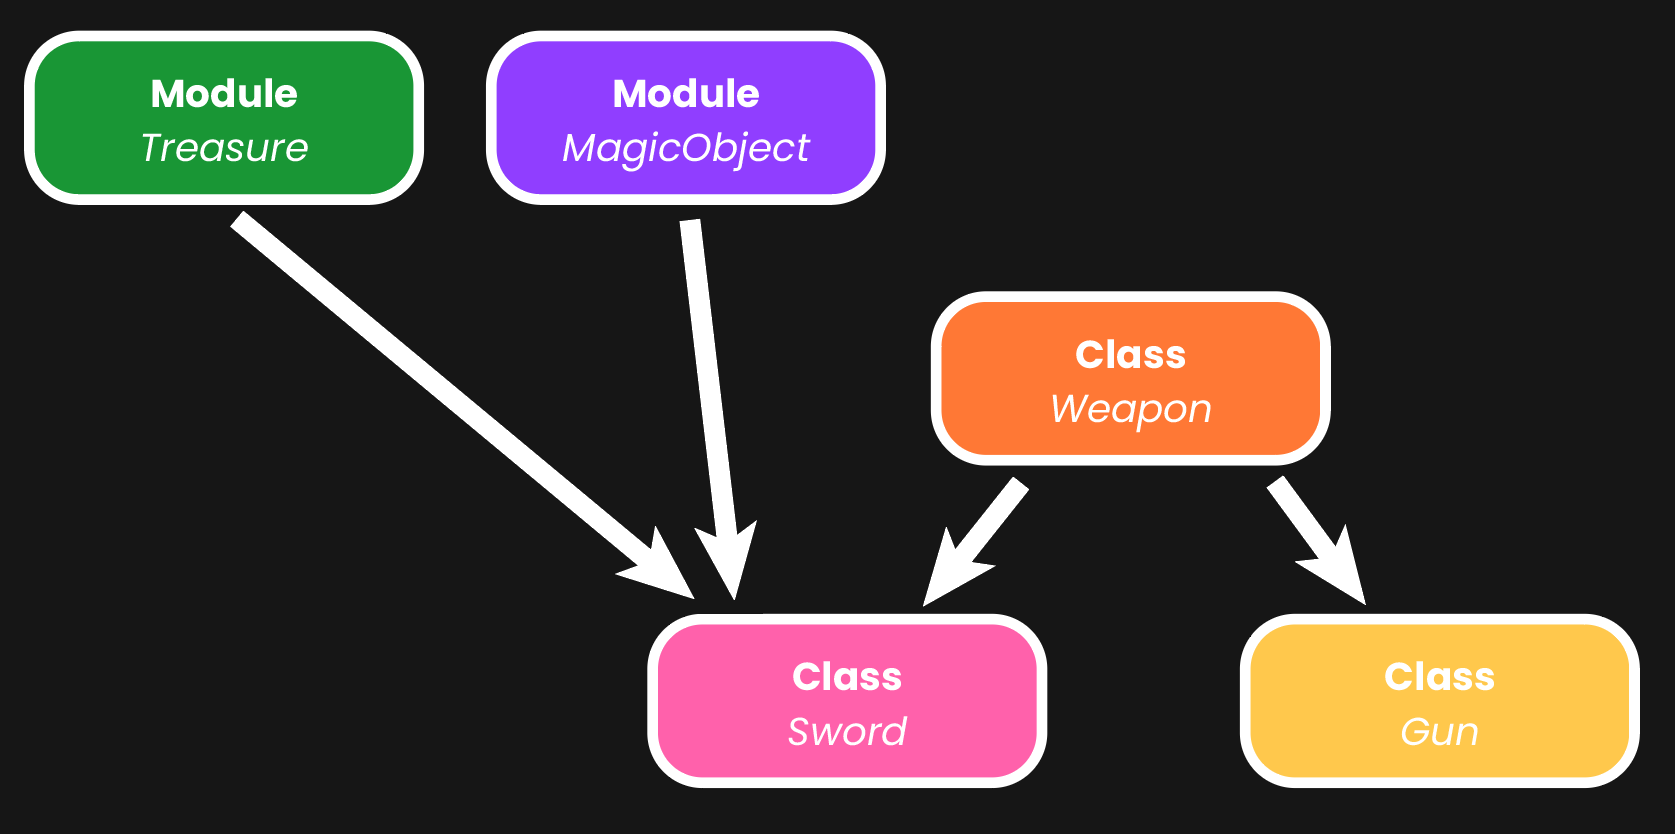

#### Pruebas del código real

La espada desciende de la Clase Weapon, pero además tiene propiedades de los módulos MagicObject y Treasure

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

# Clase arma, general a todas las armas
class Weapon
  attr_accessor :attack
end

# Modulo declarado
module MagicObject
	attr_accessor :power
end

# Modulo declarado
module Treasure
	attr_accessor :value
	attr_accessor :owner
end


# Clase espada, desciende de arma
class Sword < Weapon
  # Incluye dentro referncia a los módulos ya declarados, puede usar sus propiedades generadas!
  include Treasure
  include MagicObject

  # Propiedad propia
  attr_accessor :name
end

# Instancia y ejecución
s = Sword.new
s.name = "Master Sword"
s.attack = "high"
s.value = 1000
s.owner = "Melody Dwarf"
s.power = "Glows in pressence of evil."

puts(s.name)
puts(s.attack)
puts(s.value)
puts(s.owner)
puts(s.power)

No se puede asignar la herencia desde módulos, pero se pueden incluir dentro

Los módulos son conjuntos de código que se pueden incluir en clases que necesiten atributos compartidos, *si algo va a estar compartido muchas veces, es mejor ponerlo en un módulo*.

``No se pueden crear instancias de módulos``. Lo que sí se puede hacer, es, crear una instancia de una clase referenciándola desde su módulo:

In [ ]:
a = ModuleName::ClassName.new()

#### *Un módulo puede ser compartido por distintas clases sin ninguna relación entre sí*, como es el el caso de la clase Jewel

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

module MagicObject
	attr_accessor :power
end

module Treasure
	attr_accessor :value
	attr_accessor :owner
end

class Weapon
	attr_accessor :attack
end

class Sword < Weapon
  include Treasure # Modulo compartido
  include MagicObject

  attr_accessor :name
end

# Nueva clase añadida, tiene los métodos de Treasure
class Jewel
	include Treasure # Modulo compartido
	attr_accessor :stone
end

s = Sword.new
s.name = "Master Sword"
s.attack = "high"
s.value = 1000
s.owner = "Melody Dwarf"
s.power = "Glows in pressence of evil."

puts(s.name)
puts(s.attack)
puts(s.value)
puts(s.owner)
puts(s.power)

# Instancia y ejecución de la nueva clase
puts
j = Jewel.new
j.stone = "Sapphire"
j.value = 500
j.owner = "The Ancient Sea Creature"

puts j.stone
puts j.value
puts j.owner

Ahora el diagrama queda tal que así:

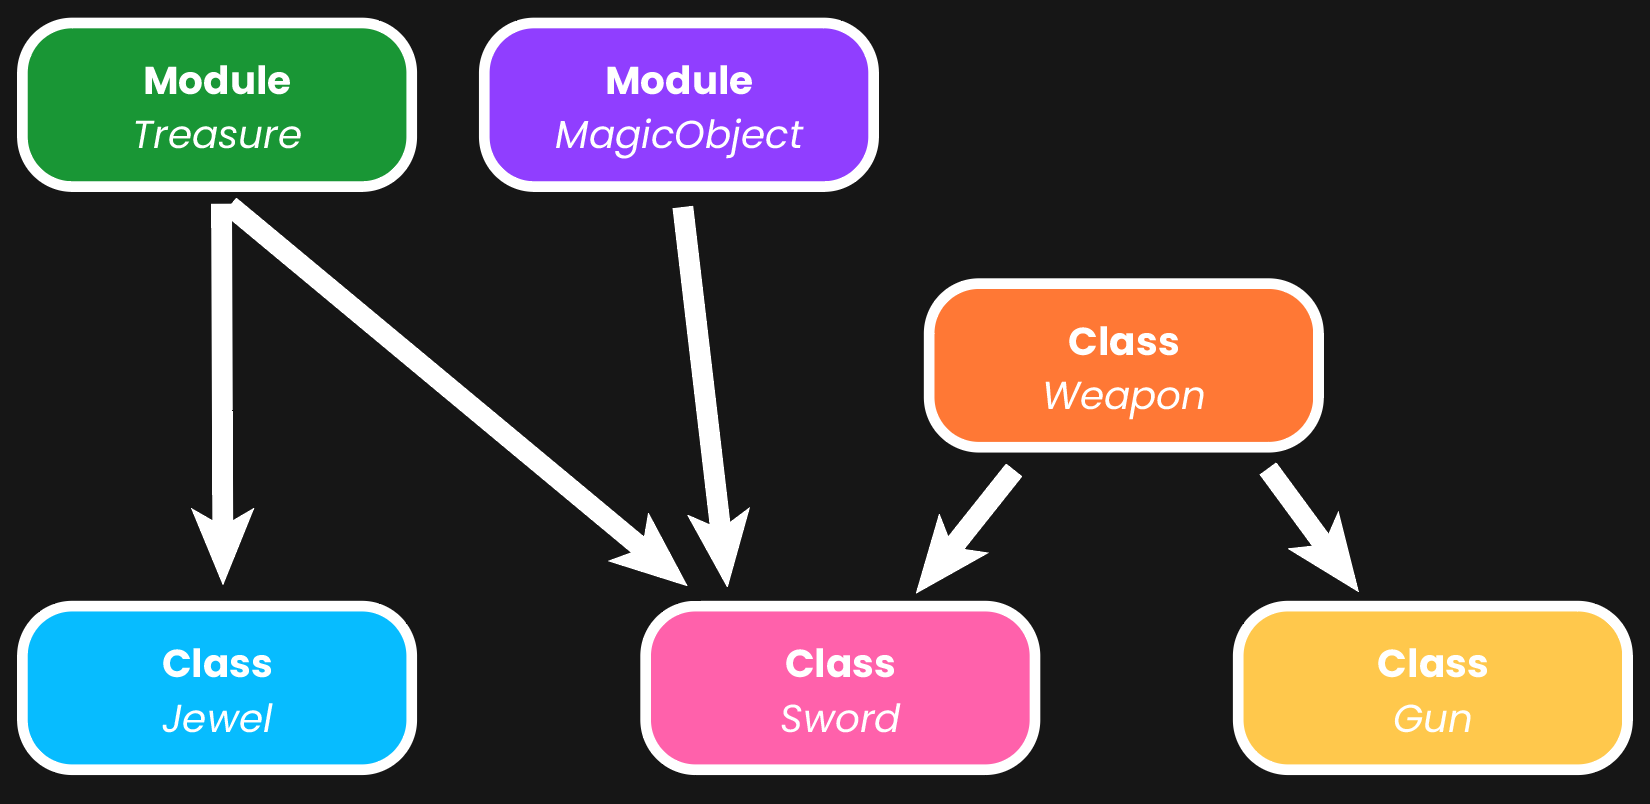

> Investigar que es lo que hace attr ya estuvo bueno de no saber

> Realmente investigar el attr 💀

### Sobre los módulos y su parecido con las clases:

A nivel de propiedades son prácticamente idénticos, no así a nivel de funciones y uso

In [ ]:
module M
  def greet
    puts "Método de instancia greet"
  end

  def M.greet
    puts "M.greet método"
  end

  # Self tambien funciona
  def self.bye
    puts "Bye im tired from living"
  end

  # Los modulos tambien pueden tener datos privados
  private

  def secretGreet
    puts "No deberías leer esto."
  end
end

class C
  include M
end

obj = C.new
# Los módulos pueden crear métodos para referirse a sí mismos, igulamente con self
M.greet
M.bye
# La clase creada puede acceder a todos los metodos públicos del módulo
obj.greet
# Metodo privado, no puede accederse directamente, dará error
# 
begin
  obj.secretGreet
rescue
  puts "⚔️ Este método y sus datos son privados ⚔️"
end

#### Parecidos pero no iguales: Un módulo no puede instanciarse ni le van a funcionar funciones de Clase

#### Un módulo no puede heredar de otro, pero curiosamente si se puede hacer que ``una clase creada por nosotros herede de la clase módulo`` 

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

# Función recursiva que muestra todos los ancestros hasta arriba
def showFamily( aClass )
	if (aClass != nil) then			
		puts( aClass )			
		showFamily( aClass.superclass )
	end
end

puts( "Class hierarchy of Class... 💃" )
showFamily( Class )

# Está mucho más arriba en la escala de herencia, pues Module es Clase padre de Class
class X < Module
end
puts( "Class hierarchy of X... 👯" )
showFamily( X )

Lo notable de la Clase Clase, es `su habilidad para crear objetos`, una característica no compartida por su ancestro.

El comportamiento de los módulos permite que podamos usar métodos y constantes ya listos desde un módulo en particular; Como es el caso de MATH:

In [ ]:
puts Math.sqrt(144) # Método para calcular raíces cuadradas
puts Math::PI # La constante PI

### Los módulos en profundidad ⛩️

Un módulo es como una clase, pero una clase no es como un módulo

In [ ]:
module MyModule
  REWARD = 100

  def prize
    return "Has ganado #{REWARD} puntos"
  end

  def self.lose
    return "Sorry no ganaste nada"
  end
end

class MyClass
  include MyModule
end

puts MyModule::REWARD
puts MyModule.lose

myVar = MyClass.new

puts myVar.prize

### Módulos as Namespaces

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

module MyModule
  GOODMOOD = "happy"
  BADMOOD = "grumpy"
  
 def greet
   return "I'm #{GOODMOOD}. How are you?"
 end
 
 def MyModule.greet
   return "I'm #{BADMOOD}. How are you?"
 end
end	

module MyModuleSecond
  GOODMOOD = "exited"
  BADMOOD = "depressed"
  
 def greet
   return "I'm #{GOODMOOD}. How are you?"
 end
 
 def MyModuleSecond.greet
   return "I'm #{BADMOOD}. How are you?"
 end
end	


puts("➡️ MyModule::GOODMOOD")	
puts(MyModule::GOODMOOD)	# Para acceder a las constantes dentro del módulo se especifica el nombre el módulo primero
puts( "➡️ MyModule.greet" )
puts( MyModule.greet )
puts "--------------------------------------"
puts("➡️ MyModuleSecond::GOODMOOD")	
puts(MyModuleSecond::GOODMOOD)	# Para acceder a las constantes dentro del módulo se especifica el nombre el módulo primero
puts( "➡️ MyModuleSecond.greet" )
puts( MyModuleSecond.greet )

### Módulos como mixins

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

module MyModule
  GOODMOOD = "happy"
  BADMOOD = "grumpy"
  
 def greet
   return "I'm #{GOODMOOD}. How are you?"
 end
 
 def MyModule.greet
   return "I'm #{BADMOOD}. How are you?"
 end
end	

# Para usar un método normal de dentro del módulo primero hay que crear una clase que contenga el módulo
class MyClass
  include MyModule
 
 def sayHi
   puts( greet )
 end
   
end

ob = MyClass.new
ob.sayHi
puts(ob.greet)

En el registro del debug se ve como para seguir la ejecución la instrucción se va hasta arriba al módulo a buscar y ejecutar la función, incluso aunque la instrucción vino desde la instancia de una clase

|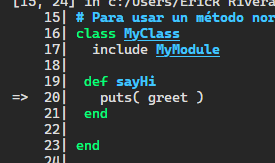|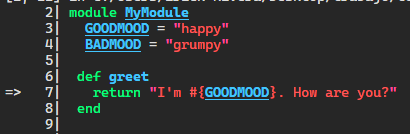|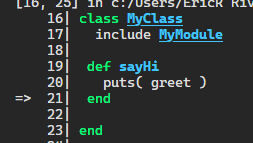|
|:---:|:---:|:---:|
|Se llama a greet|El código se va hasta greet en el módulo y lo ejecuta|Da por terminada la ejecución|

### Para evitar repetir nombres de metodo todo el rato, es mejor ser claro en especificarlos con métodos self

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

module Happy
  # Esto no es lo mismo que Sad.mood
	def Happy.mood
		return "happy"
	end
	
	def expression
		return "smiling"
	end
end

module Sad
  # Esto no es lo mismo que Happy.mood
	def Sad.mood
		return "sad"
	end
	
	def expression
		return "frowning"
	end
end

class Person
	# change the order of inclusion and run the program again
  # 
  # Gracias a ser específico en la declaración la varaible solo tiene un resultado posible, esté sad al frente o no
  # En rails 1.9 las cosas no eran así o yo estoy haciendo mal algo...
	include Happy
	include Sad
	attr_accessor :mood
	def initialize
		@mood = Happy.mood
	end
end

p1 = Person.new
puts(p1.mood)
puts(p1.expression)


Para solventar un problema ya no existe en mi versión de Ruby, se usan los ``alias``

El problema en cuestión: Si se importan dos módulos a una clase, y da la casualidad que ambos tienen un metodo con el mismo nombre dentro, la clase tomará sólo `la versión del método más reciente.` 🌴

Un alias es una copia de un método existente con un nuevo nombre

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

module Happy
	def Happy.mood
		return "happy"
	end
	
	def expression
		return "smiling"
	end
  # Primero el nombre del alias, luego el nombre del método que está tomando ese alias
	# Los alias deben ser declarados aqui mismo en el momento en el modulo
	alias happyexpression expression
end

module Sad
	def Sad.mood
		return "sad"
	end
	
	def expression
		return "frowning"
	end
	alias sadexpression expression
end

class Person
	include Happy
	include Sad
	attr_accessor :mood
	def initialize
		@mood = Happy.mood
	end
end

p2 = Person.new
puts(p2.mood)
puts(p2.expression)
puts(p2.happyexpression)
puts(p2.sadexpression)


> Con los alias, se puede ser completamente explícito sobre qué metodo de módulo hace que

> ### Los modulos siempre deben estar en archivos a parte de nuestro programa principal

Para usarlos, se llaman de la siguiente manera:

In [ ]:
# require_module2.rb en la codebase
require 'nombre_de_modulo_aqui.rb'

# Section 8: Files, YAML and Marshal 🐬

### Archivos y I/O (Input/Output)

La clase ``File`` hereda de ``I/O`` según la <a href="https://ruby-doc.org/3.1.3/File.html">documentación</a>.

> Gracias a esto podemos saber, que dentro de la clase I/O también tenemos formas de manipular archivos.

Este código imprime todas las letras de una canción que estaban dentro de un documento de texto.

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

puts('IO.foreach...')
IO.foreach("stranger-alien.txt") {|line| print( line ) }

puts("\n\nIO.readlines...")
lines = IO.readlines("stranger-alien.txt")
lines.each{|line| print( line )}

Pero siempre querremos usar el objeto dedicado File en su lugar.

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

# Para editar un archivo de texto, y escribir dentro de el
# f = File.new("stranger-alien.txt", "w") # Se toma el archivo con el argumento 'w'
# f.puts("Ai", "-", "Katsu") # Se escribe dentro con puts
# f.close # Se cierra

charcount = 0
linecount = 0

# Aquí solo se lee con 'r'. Se muestra el final de cada linea, y luego se cuentan todas junto con los caracteres que tiene el texto.
f = File.new("stranger-alien.txt", "r")
while !( f.eof ) do # mientras el archivo no se acabe hacer:
	c = f.getc()
	if ( c.ord == 10 ) then 		
		linecount += 1
		puts( " <End Of Line #{linecount}>" )
	else
		putc( c )
		charcount += 1
	end
end

if f.eof then 
	puts( "<End Of File>" ) 
end

# Siempre es importante cerrar los archivos una vez trabajamos con ellos.
f.close

puts("This file contains #{linecount} lines and #{charcount} characters." )

In [ ]:
# Pruebas para entender métodos
# 
f = File.new("stranger-alien.txt", "r")

cont = 0

while !(f.eof) do
  cont += 1
  print "#{cont}, "
  f.getc() # AVANZAR AL SIGUIENTE CARACTER :0
end

f.close


### 👁️ Modos importantes de tener en cuenta sobre lo que se puede hacer con un objeto File 👁️

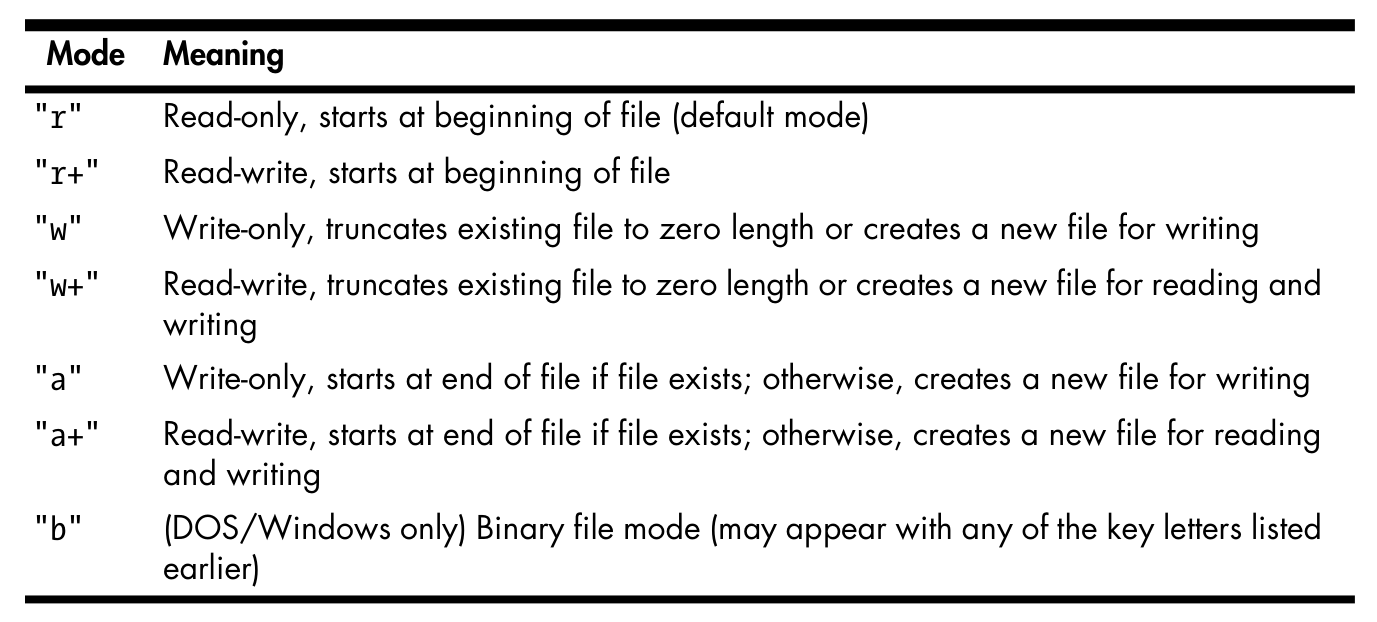

Una explicación mejor de lo que hace el código anterior:

In [ ]:
# The Book of Ruby - http://www.sapphiresteel.com

# Para crear un arhivo de texto y escribir dentro de el
f = File.new("animal-list.txt", "w") # Sabemos que se está escribiendo pues usamos w
f.puts("perro", "gato", "pájaro", "pez", "león", "elefante", "serpiente", "mono", "tigre", "oso") # Se escribe dentro con puts
f.close # Se cierra

charcount = 0
linecount = 0

# Trabajamos sobre el archivo creado. Aquí solo se lee con 'r'. Se muestra el final de cada linea, y luego se cuentan todas junto con los caracteres que tiene el texto.
f = File.new("animal-list.txt", "r")
while !( f.eof ) do # mientras el archivo no se acabe hacer:
	c = f.getc() # Avanzamos al siguiente caracter
	if ( c.ord == 10 ) then # .ord extrae el valor ASCII del caracter! Aquí se está evaluando si se corresponde con el número 10. Que es el valor ASCII para el salto de línea!
		# Acción secundaria, saltos de linea
		linecount += 1
    #puts "EL VALOR ASCII DEL CARACTER ACTUAL ES: #{c.ord}"
		puts( " <End Of Line #{linecount}>" )
	else
		# Accion principal, escribir caracter por caracter
		putc( c )
    #puts "EL VALOR ASCII DEL CARACTER ACTUAL ES: #{c.ord}"
		charcount += 1
	end
end

if f.eof then 
	puts( "<End Of File>" ) 
end

# Siempre es importante cerrar los archivos una vez trabajamos con ellos.
f.close

puts("This file contains #{linecount} lines and #{charcount} characters." )

# Course workflow 🔥

- We will be treating the Ruby Modules as Method collections
- Code will be written in "/my-source/"
- Examples of the code working will be called into the notebook via Instance Methods
- Each module of the course will be called after a letter

- A Kernel restar may be necessary after each change...

# Homework ✏️

- Re-write and learn from the Ruby programs in this repo 
    - Chapter 2
    - Chapter 6
    - Chapter 7